In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import math


def show_bpc(folder_path):
    data_dict = {}
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = (data['neg_log_prob_sum'] / data['avg character count']) * (1 / math.log(2))
                
                if model_name not in data_dict:
                    data_dict[model_name] = {}
                
                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count
    
    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]
    
    styled_df = df_result_sorted.style.format("{:.3f}").set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).set_caption("<span style='font-size: 16px; font-weight: bold;'>BPC (Bits Per Character) Comparison</span>")
    
    return styled_df

def show_colored_bpc(folder_path):
    data_dict = {}
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = (data['neg_log_prob_sum'] / data['avg character count'])  * (1 / math.log(2))
                
                if model_name not in data_dict:
                    data_dict[model_name] = {}
                
                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count
    
    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]
    
    styled_df_custom = df_result_sorted.style.set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'tr', 'props': [('height', '25px')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).format("{:.3f}")
    
    light_green_to_red_cmap = LinearSegmentedColormap.from_list(
        'medium_green_to_red',
        [(0, '#63be7b'),  # medium green
         (0.5, '#ffffff'), # white
         (1, '#f8696b')]   # medium red
    )
    
    styled_df_custom = styled_df_custom.background_gradient(
        cmap=light_green_to_red_cmap,
        subset=[col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    )
    
    cream_color = '#fffdd0'
    styled_df_custom = styled_df_custom.applymap(
        lambda val: f'background-color: {cream_color}',
        subset=['Parameters Count (B)']
    )

    styled_df_custom = styled_df_custom.set_properties(**{'color': 'black'}).set_caption("<span style='font-size: 16px; font-weight: bold;'>BPC (Bits Per Character) Comparison</span>")

    return styled_df_custom

def show_bpb(folder_path):
    data_dict = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)

                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = (data['neg_log_prob_sum'] / data['avg bytes']) * (1 / math.log(2))

                if model_name not in data_dict:
                    data_dict[model_name] = {}

                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count

    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]

    styled_df = df_result_sorted.style.format("{:.3f}").set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).set_caption("<span style='font-size: 16px; font-weight: bold;'>BPB (Bits Per Byte) Comparison</span>")

    return styled_df

def show_colored_bpb(folder_path):
    data_dict = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)

                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = (data['neg_log_prob_sum'] / data['avg bytes'])  * (1 / math.log(2))

                if model_name not in data_dict:
                    data_dict[model_name] = {}

                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count

    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]

    styled_df_custom = df_result_sorted.style.set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'tr', 'props': [('height', '25px')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).format("{:.3f}")

    light_green_to_red_cmap = LinearSegmentedColormap.from_list(
        'medium_green_to_red',
        [(0, '#63be7b'),  # medium green
         (0.5, '#ffffff'), # white
         (1, '#f8696b')]   # medium red
    )

    styled_df_custom = styled_df_custom.background_gradient(
        cmap=light_green_to_red_cmap,
        subset=[col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    )

    cream_color = '#fffdd0'
    styled_df_custom = styled_df_custom.applymap(
        lambda val: f'background-color: {cream_color}',
        subset=['Parameters Count (B)']
    )

    styled_df_custom = styled_df_custom.set_properties(**{'color': 'black'}).set_caption("<span style='font-size: 16px; font-weight: bold;'>BPB (Bits Per Byte) Comparison</span>")

    return styled_df_custom

def create_radar_chart(folder_path,
                       title='Model Performance on Uncheatable Eval (Normalized, Inverted, Larger the area, the better)',
                       range_max=0.95,
                       range_min=0.80,
                       show_max=1.0,
                       show_min=0.7,
                       top_n=7):

    data_dict = {}

    for file_name in os.listdir(folder_path):

        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, 'r') as file:
                data = json.load(file)

                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = (data['neg_log_prob_sum'] / data['avg character count']) * (1 / math.log(2))

                if model_name not in data_dict:
                    data_dict[model_name] = {}

                data_dict[model_name][data_path] = result

                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count

    df_result = pd.DataFrame(data_dict).T

    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)

    df_result_2 = df_result.sort_values(by='Average (The lower the better)').drop(columns=['Parameters Count (B)']).head(top_n)

    if 'Average (The lower the better)' in df_result_2.columns:
        df_result_2 = df_result_2.drop('Average (The lower the better)', axis=1)

    data_frame = df_result_2

    labels = data_frame.columns.values
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(show_min, show_max)

    normalized_reversed_df = pd.DataFrame()
    for col in data_frame.columns:
        col_min = data_frame[col].min()
        col_max = data_frame[col].max()
        normalized_reversed_df[col] = data_frame[col].apply(lambda x: 1 - (x - col_min) / (col_max - col_min))

    for index, row in normalized_reversed_df.iterrows():
        values = row.values.tolist()
        final_values = [v * (range_max - range_min) + range_min for v in values]
        final_values += final_values[:1]
        ax.plot(angles, final_values, label=index)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_yticklabels([])
    ax.set_xticklabels(labels)
    plt.title(title, size=20, color='blue', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

def show_compression_rate(folder_path):
    data_dict = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, 'r') as file:
                data = json.load(file)

                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = data['neg_log_prob_sum'] / data['avg bytes']
                # Adjusted the calculation to include conversion to percentage
                result = result * (1 / math.log(2)) * 0.125 * 100

                if model_name not in data_dict:
                    data_dict[model_name] = {}

                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count

    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]

    styled_df = df_result_sorted.style.format("{:.3f}").set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).set_caption("<span style='font-size: 16px; font-weight: bold;'>Compression Rate Comparison (%)</span>")

    return styled_df

def show_colored_compression_rate(folder_path):
    data_dict = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, 'r') as file:
                data = json.load(file)

                model_name = data['model_name_or_path'].split('/')[-1]
                data_path = data['data_path'].split('/')[-1]
                result = data['neg_log_prob_sum'] / data['avg bytes']
                # Adjusted the calculation to include conversion to percentage
                result = result * (1 / math.log(2)) * 0.125 * 100

                if model_name not in data_dict:
                    data_dict[model_name] = {}

                data_dict[model_name][data_path] = result
                parameters_count = data['parameters count']
                data_dict[model_name]['Parameters Count (B)'] = parameters_count

    df_result = pd.DataFrame(data_dict).T
    df_result['Average (The lower the better)'] = df_result.drop(columns=['Parameters Count (B)']).mean(axis=1)
    df_result_sorted = df_result.sort_values(by='Average (The lower the better)')
    column_order = ['Parameters Count (B)'] + [col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    df_result_sorted = df_result_sorted[column_order]
    df_result_sorted.columns = [col.replace('_', '_\u200B').replace('.json', '') for col in df_result_sorted.columns]

    styled_df_custom = df_result_sorted.style.set_table_styles([
        {'selector': 'table', 'props': [('max-width', '800px'), ('overflow-x', 'auto'), ('display', 'block')]},
        {'selector': 'th.col_heading, td', 'props': [('max-width', '150px'), ('white-space', 'normal')]},
        {'selector': 'th, td', 'props': [('text-align', 'center')]},
        {'selector': 'tr', 'props': [('height', '25px')]},
        {'selector': 'th.row_heading', 'props': [('font-size', '1.0em'), ('max-width', '200px'), ('overflow', 'hidden'), ('text-overflow', 'ellipsis'), ('white-space', 'nowrap')]}
    ]).format("{:.3f}")

    light_green_to_red_cmap = LinearSegmentedColormap.from_list(
        'medium_green_to_red',
        [(0, '#63be7b'),  # medium green
         (0.5, '#ffffff'), # white
         (1, '#f8696b')]   # medium red
    )

    styled_df_custom = styled_df_custom.background_gradient(
        cmap=light_green_to_red_cmap,
        subset=[col for col in df_result_sorted.columns if col != 'Parameters Count (B)']
    )

    cream_color = '#fffdd0'
    styled_df_custom = styled_df_custom.applymap(
        lambda val: f'background-color: {cream_color}',
        subset=['Parameters Count (B)']
    )
    
    styled_df_custom = styled_df_custom.set_properties(**{'color': 'black'}).set_caption("<span style='font-size: 16px; font-weight: bold;'>Compression Rate Comparison (%)</span>")
    
    return styled_df_custom

In [2]:
folder_path = 'logs'

In [3]:
show_bpc(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,0.863,0.621,0.617,0.659,0.346,0.364,0.642,0.588
Mistral-7B-v0.1,7.242,0.867,0.640,0.647,0.662,0.391,0.410,0.662,0.611
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,0.855,0.661,0.660,0.697,0.414,0.448,0.690,0.632
OLMo-1.7-7B-hf,6.888,0.904,0.652,0.657,0.692,0.404,0.432,0.701,0.635
Qwen1.5-7B,7.721,0.913,0.648,0.648,0.729,0.392,0.398,0.738,0.638
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,0.862,0.667,0.665,0.707,0.420,0.454,0.697,0.639
mpt-7b,6.649,0.918,0.665,0.676,0.696,0.404,0.443,0.687,0.641
Llama-2-7b-hf,6.738,0.891,0.679,0.690,0.681,0.425,0.467,0.681,0.645
falcon-7b,6.922,0.884,0.697,0.724,0.697,0.468,0.498,0.716,0.669
aya-23-8B,8.028,0.961,0.709,0.740,0.719,0.451,0.469,0.745,0.685


In [4]:
show_colored_bpc(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,0.863,0.621,0.617,0.659,0.346,0.364,0.642,0.588
Mistral-7B-v0.1,7.242,0.867,0.640,0.647,0.662,0.391,0.410,0.662,0.611
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,0.855,0.661,0.660,0.697,0.414,0.448,0.690,0.632
OLMo-1.7-7B-hf,6.888,0.904,0.652,0.657,0.692,0.404,0.432,0.701,0.635
Qwen1.5-7B,7.721,0.913,0.648,0.648,0.729,0.392,0.398,0.738,0.638
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,0.862,0.667,0.665,0.707,0.420,0.454,0.697,0.639
mpt-7b,6.649,0.918,0.665,0.676,0.696,0.404,0.443,0.687,0.641
Llama-2-7b-hf,6.738,0.891,0.679,0.690,0.681,0.425,0.467,0.681,0.645
falcon-7b,6.922,0.884,0.697,0.724,0.697,0.468,0.498,0.716,0.669
aya-23-8B,8.028,0.961,0.709,0.740,0.719,0.451,0.469,0.745,0.685


In [5]:
show_bpb(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,0.848,0.619,0.614,0.658,0.343,0.359,0.639,0.583
Mistral-7B-v0.1,7.242,0.852,0.639,0.643,0.660,0.388,0.405,0.658,0.606
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,0.841,0.659,0.657,0.695,0.411,0.442,0.685,0.627
OLMo-1.7-7B-hf,6.888,0.889,0.650,0.653,0.690,0.401,0.426,0.697,0.630
Qwen1.5-7B,7.721,0.897,0.646,0.644,0.727,0.389,0.392,0.734,0.633
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,0.848,0.665,0.661,0.705,0.416,0.448,0.693,0.634
mpt-7b,6.649,0.903,0.663,0.672,0.694,0.401,0.437,0.683,0.636
Llama-2-7b-hf,6.738,0.876,0.677,0.686,0.679,0.421,0.461,0.677,0.640
falcon-7b,6.922,0.869,0.695,0.720,0.695,0.464,0.492,0.711,0.664
aya-23-8B,8.028,0.944,0.707,0.736,0.717,0.447,0.463,0.740,0.679


In [6]:
show_colored_bpb(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,0.848,0.619,0.614,0.658,0.343,0.359,0.639,0.583
Mistral-7B-v0.1,7.242,0.852,0.639,0.643,0.660,0.388,0.405,0.658,0.606
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,0.841,0.659,0.657,0.695,0.411,0.442,0.685,0.627
OLMo-1.7-7B-hf,6.888,0.889,0.650,0.653,0.690,0.401,0.426,0.697,0.630
Qwen1.5-7B,7.721,0.897,0.646,0.644,0.727,0.389,0.392,0.734,0.633
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,0.848,0.665,0.661,0.705,0.416,0.448,0.693,0.634
mpt-7b,6.649,0.903,0.663,0.672,0.694,0.401,0.437,0.683,0.636
Llama-2-7b-hf,6.738,0.876,0.677,0.686,0.679,0.421,0.461,0.677,0.640
falcon-7b,6.922,0.869,0.695,0.720,0.695,0.464,0.492,0.711,0.664
aya-23-8B,8.028,0.944,0.707,0.736,0.717,0.447,0.463,0.740,0.679


In [7]:
show_compression_rate(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,10.605,7.742,7.676,8.221,4.287,4.489,7.981,7.286
Mistral-7B-v0.1,7.242,10.653,7.982,8.040,8.251,4.854,5.057,8.229,7.581
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,10.513,8.235,8.208,8.686,5.133,5.529,8.566,7.839
OLMo-1.7-7B-hf,6.888,11.113,8.131,8.163,8.627,5.015,5.330,8.713,7.870
Qwen1.5-7B,7.721,11.218,8.078,8.055,9.090,4.864,4.904,9.170,7.911
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,10.598,8.312,8.267,8.816,5.203,5.600,8.659,7.922
mpt-7b,6.649,11.286,8.289,8.403,8.678,5.016,5.463,8.533,7.952
Llama-2-7b-hf,6.738,10.955,8.464,8.575,8.487,5.266,5.757,8.458,7.994
falcon-7b,6.922,10.861,8.689,9.005,8.690,5.805,6.148,8.888,8.298
aya-23-8B,8.028,11.804,8.837,9.205,8.959,5.593,5.791,9.255,8.492


In [8]:
show_colored_compression_rate(folder_path)

,Parameters Count (B),ao3_​english_​20240501to20240515,arxiv_​computer_​science_​20240501to20240515,arxiv_​physics_​20240501to20240515,bbc_​news_​20240501to20240515,github_​cpp_​20240501to20240515,github_​python_​20240501to20240515,wikipedia_​english_​20240501to20240515,Average (The lower the better)
Meta-Llama-3-8B,8.030,10.605,7.742,7.676,8.221,4.287,4.489,7.981,7.286
Mistral-7B-v0.1,7.242,10.653,7.982,8.040,8.251,4.854,5.057,8.229,7.581
RWKV-x060-World-7B-v2.1-20240507-ctx4096.pth,7.636,10.513,8.235,8.208,8.686,5.133,5.529,8.566,7.839
OLMo-1.7-7B-hf,6.888,11.113,8.131,8.163,8.627,5.015,5.330,8.713,7.870
Qwen1.5-7B,7.721,11.218,8.078,8.055,9.090,4.864,4.904,9.170,7.911
RWKV-5-World-7B-v2-20240128-ctx4096.pth,7.518,10.598,8.312,8.267,8.816,5.203,5.600,8.659,7.922
mpt-7b,6.649,11.286,8.289,8.403,8.678,5.016,5.463,8.533,7.952
Llama-2-7b-hf,6.738,10.955,8.464,8.575,8.487,5.266,5.757,8.458,7.994
falcon-7b,6.922,10.861,8.689,9.005,8.690,5.805,6.148,8.888,8.298
aya-23-8B,8.028,11.804,8.837,9.205,8.959,5.593,5.791,9.255,8.492


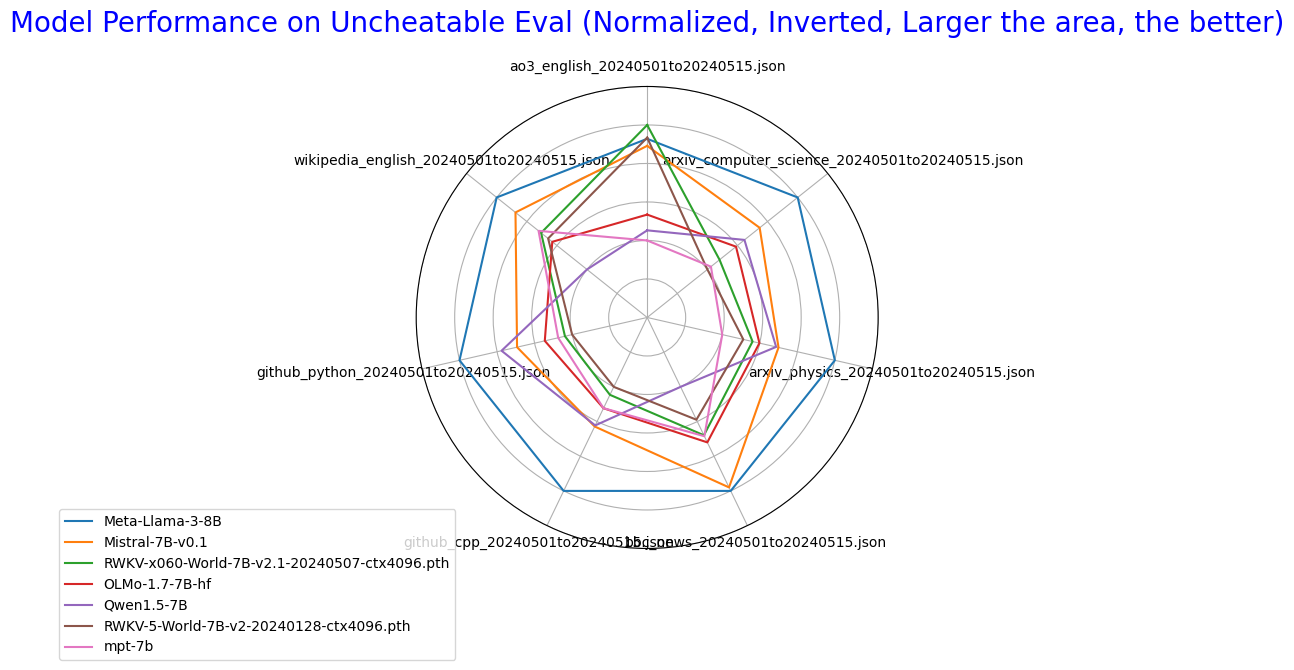

In [9]:
create_radar_chart(folder_path)